# Tarea 3. Midiendo rendimiento y riesgo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.maxpixel.net/static/photo/1x/Wall-Street-Dices-Over-Newspaper-Profit-Loss-Risk-2656028.jpg" width="600px" height="400px" />

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea3_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea3_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (20 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2011 hasta el 31 de diciembre del 2015.

1. Mostrar el DataFrame de los precios diarios (10 puntos).
2. Graficar los precios (10 puntos).

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
docs = ['^GSPC','MSFT','WBA','TSLA']
def read_AdjClose(docs):
    res = pd.read_csv(docs[0]+'.csv',index_col='Date')['Adj Close']
    for i in range(len(docs)-1): 
        a = pd.read_csv(docs[i+1]+'.csv',index_col='Date')
        res = pd.concat([res,a['Adj Close']],axis=1)
    res.columns = docs
    return(res)



In [23]:
Adj = read_AdjClose(docs)
Adj.head()

,^GSPC,MSFT,WBA,TSLA
Date,,,,
2011-01-03,1271.869995,22.558224,32.173080,26.620001
2011-01-04,1270.199951,22.646908,32.443100,26.670000
2011-01-05,1276.560059,22.574345,32.893124,26.830000
2011-01-06,1273.849976,23.235449,32.991314,27.879999
2011-01-07,1271.500000,23.058081,32.794937,28.240000


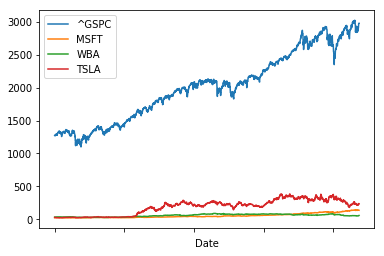

In [24]:
Adj.plot();

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [26]:
pct = Adj.pct_change().dropna()
pct.head()

,^GSPC,MSFT,WBA,TSLA
Date,,,,
2011-01-04,-0.001313,0.003931,0.008393,0.001878
2011-01-05,0.005007,-0.003204,0.013871,0.005999
2011-01-06,-0.002123,0.029286,0.002985,0.039135
2011-01-07,-0.001845,-0.007634,-0.005952,0.012913
2011-01-10,-0.001376,-0.013287,0.021707,0.007436


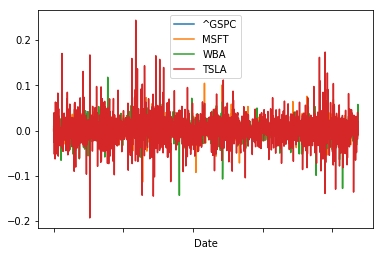

In [27]:
pct.plot();

## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [33]:
pct_mean = pct.mean()*252
pct_mean

^GSPC    0.108753
MSFT     0.233887
WBA      0.097182
TSLA     0.375498
dtype: float64

In [94]:
pct_std = pct.std()*252**(1/2)
pct_std

^GSPC    0.145166
MSFT     0.230503
WBA      0.249818
TSLA     0.500087
dtype: float64

In [37]:
pd.DataFrame([pct_mean,pct_std],index=['mean','std'])

,^GSPC,MSFT,WBA,TSLA
mean,0.108753,0.233887,0.097182,0.375498
std,0.145166,0.230503,0.249818,0.500087


## 4. Gráfico rendimientos esperados vs. volatilidad (30 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (10 puntos).

*Nota:* el ajuste de la línea recta corresponde a una regresión lineal. Si no saben como hacerlo, por favor preguntar en asesoría.

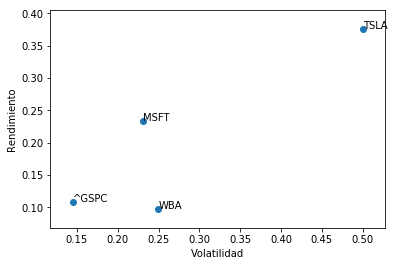

In [48]:
plt.scatter(pct_std,pct_mean)
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
for i in range(len(docs)):
    plt.text(pct_std.values[i],pct_mean.values[i],docs[i])

In [124]:
A = np.ones([len(docs),2])
A[:,1] = pct_std
A

array([[1.        , 0.14516567],
       [1.        , 0.23050322],
       [1.        , 0.24981756],
       [1.        , 0.5000874 ]])

In [125]:
B = np.ones([len(docs),1])
B[:,0] = pct_mean
B

array([[0.10875262],
       [0.23388727],
       [0.09718176],
       [0.37549844]])

In [147]:
REG = np.linalg.pinv(A.dot(A.T)).dot(A).T.dot(B) #mínimos cuadrados
# REG = np.linalg.inv(A.dot(A.T)).dot(A).T.dot(B) #Originalmente se supone que se debe utilizar la inversa,
# sin embargo, cuando se utilizaba este método salía una curva que no se asemejaba al resultado esperado. 
# Utilizando la pseudo-inversa se obtiene el resultado deseado. 
REG

array([[-0.00662791],
       [ 0.74791336]])

$B0 = -0.0066$, $B1 = 0.7479$

recta: $-0.0066 + 0.7479x$

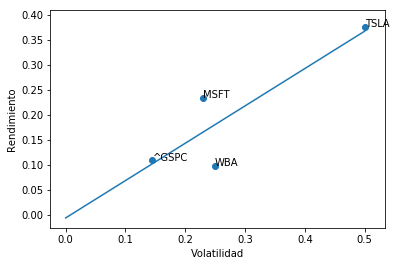

In [149]:
plt.scatter(pct_std,pct_mean)
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
for i in range(len(docs)):
    plt.text(pct_std.values[i],pct_mean.values[i],docs[i])
plt.plot([0,pct_std.max()],[REG[0],REG[0]+REG[1]*pct_std.max()])


Para este conjunto de datos, cada unidad de riesgo proporciona .7479 unidades de rendimiento, es inverso a lo esperado, supongo que normalmente se preferirìa tomar un riesgo mayor si existe mayor rendimiento que riesgo. Por su parte, el intercepto de la recta con el eje de las 'y' (rendimiento) resulta ser negativo. Esto es poco lógico, puesto que si no se asume ningun riesgo se corre el riesgo de tener perdidas... no se si estas tengan que ver con medidas inflacionarias o su equivalente. También es importante recalcar que el intercepto es bastante cercano a 0, esto puede deberse a que el peso de TSLA ha ofrecido más rendimiento/volatilidad que el resto del mercado (o para este ejemplo las 3 acciones restantes) y debido al comportamiento de Tesla, la curva ajustada tiene un intercepto inesperado en el eje 'y'

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>